In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt 
%matplotlib inline
import re
from shapely.geometry import Polygon
pd.set_option('max_columns', 250)
import numpy

### Read Zillow All Home Median Value per Sq Ft data - Keep only New York

In [2]:
zillow_data = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')
zillow_data[zillow_data.RegionName > 10000].sort_values(by='RegionName')
zillow_newyork = zillow_data[zillow_data.City == 'New York']
zillow_newyork.sort_values(by='RegionName', inplace=True)
zillow_newyork.head(5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,...,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
2147,61615,10001,New York,NY,New York,New York,2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.0,679.0,720.0,758.0,792.0,824.0,849.0,865.0,882.0,889.0,886.0,882.0,891.0,899.0,906.0,916.0,931.0,945.0,968.0,999.0,1031.0,1053.0,1068.0,...,1133.0,1123.0,1122.0,1123.0,1128.0,1138.0,1155.0,1167.0,1168.0,1169.0,1177.0,1191.0,1206.0,1222.0,1231.0,1235.0,1234.0,1230.0,1226.0,1225.0,1226.0,1225.0,1219.0,1208.0,1198.0,1192.0,1183.0,1163.0,1141.0,1119.0,1097.0,1081.0,1072.0,1065.0,1057.0,1045.0,1032.0,1027.0,1034.0,1043.0,1056.0,1069.0,1079.0,1083.0,1084.0,1082.0,1084.0,1090.0,1093.0,1090.0,1087.0,1087.0,1091.0,1093.0,1096.0,1104.0,1116.0,1128.0,1137.0,1144.0,1148.0,1149.0,1151.0,1159.0,1167.0,1176.0,1187.0,1197.0,1203.0,1209.0,1215.0,1226.0,1240.0,1259.0,1284.0,1307.0,1321.0,1336.0,1352.0,1370,1392,1414,1436,1465,1500,1522,1531,1540,1548,1547,1540,1534,1535,1542,1552,1553,1551,1551,1553,1561,1583,1613,1643,1663,1673,1674,1672,1669,1673,1686.0,1696.0,1695.0,1696.0,1703,1710,1718,1719,1716,1720,1716.0,1705,1697,1693,1687,1685
5,61616,10002,New York,NY,New York,New York,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0,722.0,713.0,714.0,723.0,736.0,755.0,779.0,804.0,819.0,827.0,...,947.0,942.0,942.0,945.0,950.0,958.0,972.0,981.0,980.0,976.0,979.0,981.0,987.0,99

In [3]:
zillow_newyork.RegionName = zillow_newyork.RegionName.astype(str)
zillow_newyork.RegionName.dtype

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


dtype('O')

### Read NYC ZIP Codes shapefiles

In [4]:
zip_codes = gpd.read_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zip_codes.sort_values(by='ZIPCODE', inplace=True)
zip_codes.head(8)

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
54,3.830099e+07,0,New York,061,25.0,Central Park,0.0,0.0,NY,36,http://www.usps.com/,00083,"POLYGON ((998309.7254775614 229616.6812362969,..."
82,1.779494e+07,0,New York,061,22413.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10001,"POLYGON ((981958.6472873986 213464.4530421346,..."
92,2.628013e+07,0,New York,061,81305.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10002,"POLYGON ((991339.8703228086 207576.7837151289,..."
90,1.553838e+07,0,New York,061,55878.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10003,"POLYGON ((989830.469142139 207048.1263078749, ..."
113,7.679616e+06,0,New York,061,2187.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10004,"POLYGON ((977542.4500830621 188447.2783390433,..."
114,6.707080e+05,0,New York,061,2187.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10004,"POLYGON ((971218.3702115566 190710.8587856293,..."
109,1.202708e+06,0,New York,061,2187.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10004,"POLYGON ((972696.8446168154 193014.5477478057,..."
106,4.002521e+06,0,New York,061,2187.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10004,"POLYGON ((981197.408652395 196571.0816452205, ..."


In [5]:
zip_codes = zip_codes.to_crs(epsg=4269)
zip_codes.crs

{'init': 'epsg:4269', 'no_defs': True}

### Merge with New York Zillow data
129 rows originally, 128 after merge

In [6]:
zillow_newyork_zips = zillow_newyork.merge(zip_codes, left_on='RegionName', right_on='ZIPCODE')
zillow_newyork_zips.sort_values(by='RegionName', inplace=True)
zillow_newyork_zips = gpd.GeoDataFrame(zillow_newyork_zips)
zillow_newyork_zips.head(6)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,...,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
0,61615,10001,New York,NY,New York,New York,2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.0,679.0,720.0,758.0,792.0,824.0,849.0,865.0,882.0,889.0,886.0,882.0,891.0,899.0,906.0,916.0,931.0,945.0,968.0,999.0,1031.0,1053.0,1068.0,...,1222.0,1231.0,1235.0,1234.0,1230.0,1226.0,1225.0,1226.0,1225.0,1219.0,1208.0,1198.0,1192.0,1183.0,1163.0,1141.0,1119.0,1097.0,1081.0,1072.0,1065.0,1057.0,1045.0,1032.0,1027.0,1034.0,1043.0,1056.0,1069.0,1079.0,1083.0,1084.0,1082.0,1084.0,1090.0,1093.0,1090.0,1087.0,1087.0,1091.0,1093.0,1096.0,1104.0,1116.0,1128.0,1137.0,1144.0,1148.0,1149.0,1151.0,1159.0,1167.0,1176.0,1187.0,1197.0,1203.0,1209.0,1215.0,1226.0,1240.0,1259.0,1284.0,1307.0,1321.0,1336.0,1352.0,1370,1392,1414,1436,1465,1500,1522,1531,1540,1548,1547,1540,1534,1535,1542,1552,1553,1551,1551,1553,1561,1583,1613,1643,1663,1673,1674,1672,1669,1673,1686.0,1696.0,1695.0,1696.0,1703,1710,1718,1719,1716,1720,1716.0,1705,1697,1693,1687,1685,1.779494e+07,0,New York,061,22413.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10001,POLYGON ((-74.00827017706987 40.75258680959694...
1,61616,10002,New York,NY,New York,New York,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0,722.0,713.0,714.0,723.0,736.0,755.0,779.0,804.0,819.0,827.0,...,997.0,1010.0,1020.0,1028.0,1030.0,1022

In [7]:
zillow_newyork_zips.crs = {'init': 'epsg:4269'}
zillow_newyork_zips.crs

{'init': 'epsg:4269'}

### Campus ZIPs

In [8]:
campus = gpd.read_file('Polygons GeoJSON.json')
campus

,building,geometry
0,Jerome L. Greene Science Center,"POLYGON ((-73.95857155323 40.816689733063, -73..."
1,University Forum and Academic Conference Center,"POLYGON ((-73.958373069763 40.816009710278, -7..."
2,560 Riverside,"POLYGON ((-73.959885835648 40.816610566589, -7..."
3,Columbia Business School,"POLYGON ((-73.958276510239 40.81804975772, -73..."
4,Lenfest Center for the Arts,"POLYGON ((-73.95877 40.817438, -73.959006 40.8..."
5,Studebaker,"POLYGON ((-73.958303 40.818222, -73.957949 40...."
6,Prentis Hall,"POLYGON ((-73.959958255291 40.816565908537, -7..."
7,Nash,"POLYGON ((-73.955838382244 40.818630297068, -7..."
8,West Harlem Piers Park,"POLYGON ((-73.959767818451 40.820296782144, -7..."


In [9]:
campus.crs = {'init': 'epsg:4269'}
campus.crs

{'init': 'epsg:4269'}

In [10]:
campus_buffer = campus.buffer(0.01449275362).unary_union.centroid.buffer(0.01449275362)
campus_zips = zillow_newyork_zips[zillow_newyork_zips.intersects(campus_buffer)]
campus_zips

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,...,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
14,61638,10024,New York,NY,New York,New York,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918.0,939.0,951.0,950.0,943.0,936.0,928.0,922.0,919.0,921.0,927.0,942.0,963.0,984.0,1001.0,1022.0,...,1185.0,1189.0,1193.0,1201.0,1205.0,1201.0,1192.0,1180.0,1168.0,1153.0,1139.0,1128.0,1112.0,1089.0,1066.0,1039.0,1008.0,983.0,970.0,967.0,967.0,965.0,965.0,967.0,970.0,979.0,987.0,995.0,1001.0,1006.0,1011.0,1019.0,1026.0,1027.0,1025.0,1027.0,1035.0,1040.0,1043.0,1044.0,1048.0,1054.0,1055.0,1052.0,1052.0,1053.0,1053.0,1055.0,1062.0,1069.0,1074.0,1079.0,1087.0,1098.0,1110.0,1118.0,1123.0,1128.0,1136.0,1144.0,1148.0,1156.0,1169.0,1178.0,1182.0,1186.0,1195,1208,1222,1233,1242,1254,1266,1276,1289,1305,1319,1321,1315,1311,1314,1317,1316,1312,1313,1315,1317,1325,1340,1358,1376,1394,1405,1406,1408,1418,1435.0,1443.0,1442.0,1444.0,1458,1477,1494,1499,1492,1488,1488.0,1485,1476,1468,1471,1480,2.287734e+07,0,New York,061,58521.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10024,POLYGON ((-73.96401951406308 40.81133035983067...
15,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0,592.0,628.0,660.0,690.0,720.0,746.0,758.0,754.0,744.0,737.0,735.0,734.0,729.0,731.0,742.0,749.0,754.0,771.0,794.0,815.0,830.0,...,864.0,871.0,879.0,895.0,908.0,914.0,919.0,

In [11]:
campus_zips.set_index('RegionName', inplace=True)
campus_zips

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,...,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10024,61638,New York,NY,New York,New York,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918.0,939.0,951.0,950.0,943.0,936.0,928.0,922.0,919.0,921.0,927.0,942.0,963.0,984.0,1001.0,1022.0,1038.0,...,1185.0,1189.0,1193.0,1201.0,1205.0,1201.0,1192.0,1180.0,1168.0,1153.0,1139.0,1128.0,1112.0,1089.0,1066.0,1039.0,1008.0,983.0,970.0,967.0,967.0,965.0,965.0,967.0,970.0,979.0,987.0,995.0,1001.0,1006.0,1011.0,1019.0,1026.0,1027.0,1025.0,1027.0,1035.0,1040.0,1043.0,1044.0,1048.0,1054.0,1055.0,1052.0,1052.0,1053.0,1053.0,1055.0,1062.0,1069.0,1074.0,1079.0,1087.0,1098.0,1110.0,1118.0,1123.0,1128.0,1136.0,1144.0,1148.0,1156.0,1169.0,1178.0,1182.0,1186.0,1195,1208,1222,1233,1242,1254,1266,1276,1289,1305,1319,1321,1315,1311,1314,1317,1316,1312,1313,1315,1317,1325,1340,1358,1376,1394,1405,1406,1408,1418,1435.0,1443.0,1442.0,1444.0,1458,1477,1494,1499,1492,1488,1488.0,1485,1476,1468,1471,1480,2.287734e+07,0,New York,061,58521.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10024,POLYGON ((-73.96401951406308 40.81133035983067...
10025,61639,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
campus_zips_trans = campus_zips.transpose()
campus_zips_trans.head(10)

RegionName,10024,10025,10026,10030,10031,10032
RegionID,61638,61639,61640,61644,61645,61646
City,New York,New York,New York,New York,New York,New York
State,NY,NY,NY,NY,NY,NY
Metro,New York,New York,New York,New York,New York,New York
CountyName,New York,New York,New York,New York,New York,New York
SizeRank,47,1,1651,3010,395,331
1996-04,NaN,NaN,NaN,NaN,NaN,NaN
1996-05,NaN,NaN,NaN,NaN,NaN,NaN
1996-06,NaN,NaN,NaN,NaN,NaN,NaN
1996-07,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
campus_zips_trans = campus_zips_trans[102:258]
campus_zips_trans.head(10)

RegionName,10024,10025,10026,10030,10031,10032
2004-04,NaN,555,440,NaN,NaN,314
2004-05,NaN,592,470,NaN,NaN,331
2004-06,NaN,628,498,NaN,NaN,353
2004-07,NaN,660,519,NaN,NaN,368
2004-08,NaN,690,537,NaN,NaN,373
2004-09,NaN,720,556,NaN,NaN,373
2004-10,918,746,570,NaN,NaN,376
2004-11,939,758,580,NaN,NaN,380
2004-12,951,754,576,NaN,NaN,378
2005-01,950,744,561,NaN,NaN,371


In [14]:
campus_zips_trans.index = pd.to_datetime(campus_zips_trans.index, format='%Y-%m')
campus_zips_trans.tail(2)

RegionName,10024,10025,10026,10030,10031,10032
2017-02-01,1476,1296,1024,777,819,741
2017-03-01,1468,1290,1027,788,821,748


### Harlem ZIPs except for Campus

In [15]:
harlem_bounds = [
            [-73.9492535591,40.7968525335],[-73.9595961571,40.8011733293],[-73.9581799507,40.8031874388],[-73.9581799507,40.8055263279],[-73.9549183846,40.8100089683],[-73.9578795433,40.8113082277],[-73.9568066597,40.8126399423],[-73.9596390724,40.8138417105],[-73.9582657814,40.8157255196],[-73.9614844322,40.8193630685],[-73.9577937126,40.8230978442],[-73.9549183846,40.8275792975],[-73.9511418343,40.8349827741],[-73.934276104,40.8280014477],[-73.9335894585,40.8182263559],[-73.9426875114,40.8057212316],[-73.9410996437,40.8050390661],[-73.9429879189,40.8024402763],[-73.9446187019,40.8031874388],[-73.9492535591,40.7968525335]
        ]

harlem_box = Polygon(harlem_bounds)
harlem_zips = zillow_newyork_zips[zillow_newyork_zips.intersects(harlem_box)]
harlem_zips.set_index('RegionName', inplace=True)
harlem_zips

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,...,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,61640,New York,NY,New York,New York,1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.0,470.0,498.0,519.0,537.0,556.0,570.0,580.0,576.0,561.0,542.0,528.0,520.0,518.0,517.0,523.0,536.0,552.0,571.0,595.0,612.0,619.0,632.0,...,712.0,726.0,735.0,740.0,742.0,741.0,739.0,738.0,732.0,722.0,710.0,699.0,687.0,672.0,651.0,632.0,618.0,610.0,605.0,602.0,598.0,595.0,603.0,619.0,627.0,628.0,632.0,634.0,634.0,634.0,634.0,639.0,646.0,649.0,645.0,636.0,631.0,629.0,626.0,623.0,624.0,626.0,625.0,622.0,620.0,619.0,617.0,615.0,617.0,622.0,627.0,630.0,631.0,632.0,638.0,645.0,649.0,654.0,660.0,664.0,667.0,673.0,680.0,686.0,693.0,694.0,694,701,716,734,750,760,770,782,787,790,792,794,798,806,816,828,837,841,845,849,855,867,886,907,923,933,938,943,949,961,976.0,986.0,992.0,1003.0,1020,1040,1058,1066,1059,1050,1039.0,1030,1024,1027,1043,1064,1.109268e+07,0,New York,061,34313.0,New York,0.0,0.0,NY,36,http://www.usps.com/,10026,POLYGON ((-73.94459750392829 40.80322784032218...
10029,61643,New York,NY,New York,New York,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [16]:
harlem_exc_campus = harlem_zips[~harlem_zips.intersects(campus_zips)]
harlem_exc_campus_trans = harlem_exc_campus.transpose()
harlem_exc_campus_trans = harlem_exc_campus_trans[102:258]
harlem_exc_campus_trans.index = pd.to_datetime(harlem_exc_campus_trans.index, format='%Y-%m')
harlem_exc_campus_trans

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:376: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


RegionName,10029,10035,10039
2004-04-01,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN
2004-06-01,NaN,NaN,NaN
2004-07-01,NaN,NaN,NaN
2004-08-01,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN
2004-10-01,NaN,NaN,367
2004-11-01,NaN,NaN,363
2004-12-01,NaN,NaN,358
2005-01-01,NaN,NaN,351


### Manhattan ZIPs except Campus and Harlem

In [17]:
manhattan_bounds = [
            [-74.0142059326,40.6926135281],[-74.0279388428,40.6983401818],[-74.0183258057,40.7482973548],[-73.9345550537,40.8813331133],[-73.9294052124,40.8810735379],[-73.9225387573,40.8776989647],[-73.9167022705,40.8766605999],[-73.9081192017,40.8745838214],[-73.9091491699,40.8714685315],[-73.913269043,40.865237512],[-73.9287185669,40.8455020821],[-73.9338684082,40.8299173268],[-73.9321517944,40.8075727883],[-73.9245986938,40.8000363051],[-73.9386749268,40.7818412681],[-73.9414215088,40.7711818598],[-73.9657974243,40.744395801],[-73.9661407471,40.7316491302],[-73.9716339111,40.714216056],[-73.9805603027,40.7082305151],[-73.9987564087,40.7048471453],[-74.0142059326,40.6926135281]
        ]

manhattan_box = Polygon(manhattan_bounds)
manhattan_zips = zillow_newyork_zips[zillow_newyork_zips.intersects(manhattan_box)]
manhattan_zips.drop_duplicates(subset='RegionName', inplace=True)
manhattan_zips.set_index('RegionName', inplace=True)
manhattan_exc_campus = manhattan_zips[~manhattan_zips.intersects(campus_zips)]
manhattan_exc_campus = manhattan_zips[~manhattan_zips.intersects(harlem_zips)]
manhattan_exc_campus_trans = manhattan_exc_campus.transpose()
manhattan_exc_campus_trans = manhattan_exc_campus_trans[102:258]
manhattan_exc_campus_trans.index = pd.to_datetime(manhattan_exc_campus_trans.index, format='%Y-%m')
manhattan_exc_campus_trans.tail(5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


RegionName,10001,10002,10004,10005,10006,10007,10009,10014,10018,10021,10023,10024,10025,10033,10034,10038,10065,10069,10075,10128,10280
2016-11-01,1720,1372,1492,1353,1287,1869,1424,1862,1700,1413,1624,1488,1332,686,673,1331,1630,1747,1376,1231,1185
2016-12-01,1716,1374,1495,1350,1283,1863,1430,1866,1707,1412,1626,1488,1325,685,680,1331,1620,1742,1381,1232,1185
2017-01-01,1705,1371,1492,1344,1277,1848,1427,1873,1694,1407,1621,1485,1309,693,680,1324,1622,1729,1387,1234,1183
2017-02-01,1697,1374,1479,1341,1277,1832,1425,1877,1671,1400,1604,1476,1296,702,678,1320,1612,1715,1385,1237,1186
2017-03-01,1693,1390,1465,1342,1284,1828,1434,1877,1667,1402,1592,1468,1290,702,676,1324,1589,1707,1383,1241,1199


# PLOTs

### all ZIPs, monthly, absolute values

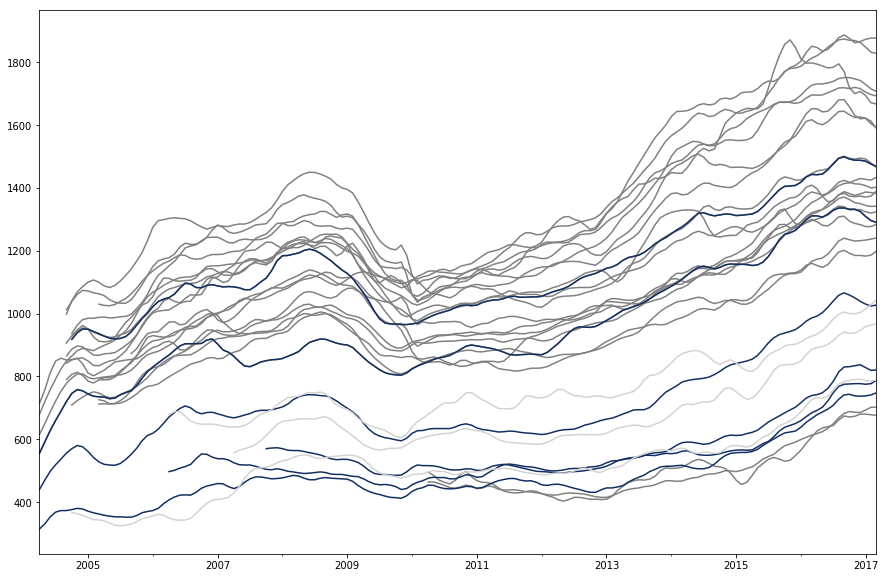

In [18]:
ax = manhattan_exc_campus_trans.plot(c='gray', label='Manhattan', legend=False, figsize=(15,10), alpha=1)
campus_zips_trans.plot(c='#122E61', label='Campus', legend=False, ax=ax)
harlem_exc_campus_trans.plot(c='lightgray', label='Harlem', legend=False, ax=ax, alpha=1)

plt.savefig('allZIPs-monthly-absolute.eps', bbox_inches='tight')

### all ZIPs, monthly, indexed

##### Export to CSV, index, re-read

In [20]:
campus_zips_trans.to_csv('campus_zips_trans_indexing.csv', index=False)
campus_zips_trans_indexing=pd.read_csv('campus_zips_trans_indexing.csv')
campus_zips_trans_indexing['Unnamed: 0'] = pd.to_datetime(campus_zips_trans_indexing['Unnamed: 0'], infer_datetime_format=True)
campus_zips_trans_indexing.head(10)

,Unnamed: 0,10024_indexed,10025_indexed,10026_indexed,10030_indexed,10031_indexed,10032_indexed
0,2004-04-01,NaN,100.000000,100.000000,NaN,NaN,100.000000
1,2004-05-01,NaN,106.666667,106.818182,NaN,NaN,105.414013
2,2004-06-01,NaN,113.153153,113.181818,NaN,NaN,112.420382
3,2004-07-01,NaN,118.918919,117.954546,NaN,NaN,117.197452
4,2004-08-01,NaN,124.324324,122.045454,NaN,NaN,118.789809
5,2004-09-01,NaN,129.729730,126.363636,NaN,NaN,118.789809
6,2004-10-01,100.000000,134.414414,129.545455,NaN,NaN,119.745223
7,2004-11-01,102.287582,136.576577,131.818182,NaN,NaN,121.019108
8,2004-12-01,103.594771,135.855856,130.909091,NaN,NaN,120.382166
9,2005-01-01,103.485839,134.054054,127.500000,NaN,NaN,118.152866


In [21]:
harlem_exc_campus_trans.to_csv('harlem_exc_campus_trans_indexing.csv', index=True)
harlem_zips_trans_indexing=pd.read_csv('harlem_exc_campus_trans_indexing.csv')
harlem_zips_trans_indexing['Unnamed: 0'] = pd.to_datetime(harlem_zips_trans_indexing['Unnamed: 0'], infer_datetime_format=True)
harlem_zips_trans_indexing.head(10)

,Unnamed: 0,10029_indexed,10035_indexed,10039_indexed
0,2004-04-01,NaN,NaN,NaN
1,2004-05-01,NaN,NaN,NaN
2,2004-06-01,NaN,NaN,NaN
3,2004-07-01,NaN,NaN,NaN
4,2004-08-01,NaN,NaN,NaN
5,2004-09-01,NaN,NaN,NaN
6,2004-10-01,NaN,NaN,100.000000
7,2004-11-01,NaN,NaN,98.910082
8,2004-12-01,NaN,NaN,97.547684
9,2005-01-01,NaN,NaN,95.640327


In [22]:
manhattan_exc_campus_trans.to_csv('manhattan_exc_campus_trans_indexing.csv', index=True)
manhattan_zips_trans_indexing=pd.read_csv('manhattan_exc_campus_trans_indexing.csv')
manhattan_zips_trans_indexing['Unnamed: 0'] = pd.to_datetime(manhattan_zips_trans_indexing['Unnamed: 0'], infer_datetime_format=True)
manhattan_zips_trans_indexing.head(10)

,Unnamed: 0,10001_indexed,10002_indexed,10004_indexed,10005_indexed,10006_indexed,10007_indexed,10009_indexed,10014_indexed,10018_indexed,10021_indexed,10023_indexed,10033_indexed,10034_indexed,10038_indexed,10065_indexed,10069_indexed,10075_indexed,10128_indexed,10280_indexed
0,2004-04-01,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN
1,2004-05-01,106.038292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.022409,NaN,NaN,NaN,NaN,105.691057,NaN,NaN,NaN,NaN,NaN
2,2004-06-01,111.634757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.725490,NaN,NaN,NaN,NaN,111.707317,NaN,NaN,NaN,NaN,NaN
3,2004-07-01,116.642121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.907563,NaN,NaN,NaN,NaN,117.398374,NaN,NaN,NaN,NaN,NaN
4,2004-08-01,121.354934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.168067,NaN,NaN,NaN,NaN,122.439024,NaN,NaN,NaN,NaN,NaN
5,2004-09-01,125.036819,NaN,NaN,100.000000,100.000000,100.000000,NaN,100.000000,119.327731,100.000000,100.000000,NaN,NaN,126.504065,NaN,NaN,NaN,NaN,NaN
6,2004-10-01,127.393225,NaN,NaN,101.306413,102.151899,102.543353,NaN,104.308617,119.467787,102.649007,102.667984,NaN,NaN,129.268293,100.000000,NaN,100.000000,100.000000,NaN
7,2004-11-01,129.896907,NaN,NaN,101.900238,102.911392,103.699422,NaN,107.114228,120.028011,104.304636,104.841897,NaN,NaN,131.382114,102.774813,NaN,102.155172,101.974612,NaN
8,2004-12-01,130.927835,NaN,NaN,99.762470,101.645570,103.352601,NaN,108.817635,120.308123,105.298013,106.126482,NaN,NaN,131.382114,104.695838,NaN,103.663793,103.526093,NaN
9,2005-01-01,130.486009,NaN,NaN,96.318290,99.367089,101.849711,NaN,110.220441,118.907563,104.966887,105.928854,NaN,NaN,129.593496,105.122732,NaN,102.478448,104.936530,NaN


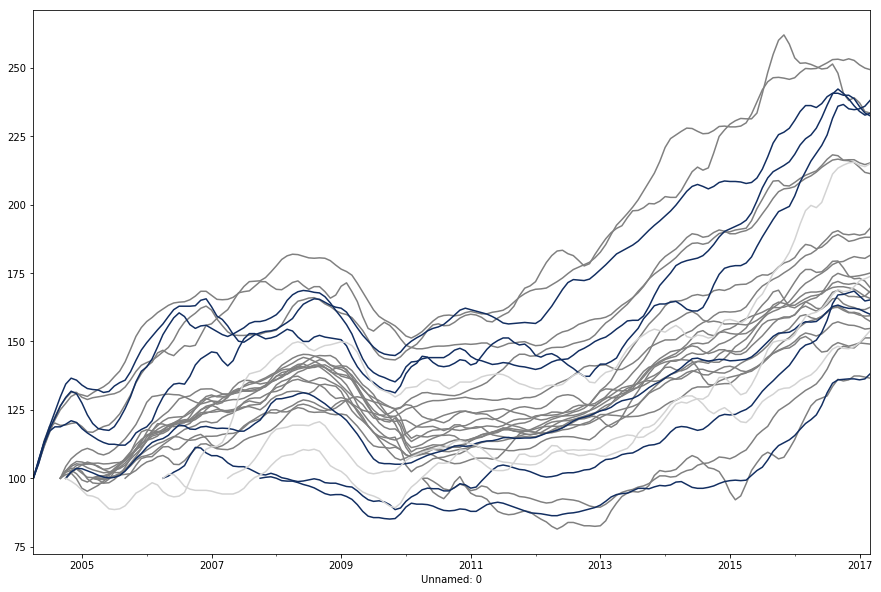

In [23]:
ax = manhattan_zips_trans_indexing.plot(x='Unnamed: 0', c='gray', label='Manhattan', legend=False, figsize=(15,10))
campus_zips_trans_indexing.plot(x='Unnamed: 0', c='#122E61', label='Campus', legend=False, ax=ax)
harlem_zips_trans_indexing.plot(x='Unnamed: 0', c='lightgray', label='Harlem', legend=False, ax=ax)

plt.savefig('allZIPs-monthly-absolute-indexed.eps', bbox_inches='tight')

## Monthly medians

In [24]:
campus_zips_trans['monthly_median'] = campus_zips_trans.apply(lambda row: row.median(), axis=1)
campus_zips_trans.tail(8)

RegionName,10024,10025,10026,10030,10031,10032,monthly_median
2016-08-01,1494,1336,1058,768,814,727,936.0
2016-09-01,1499,1336,1066,775,830,741,948.0
2016-10-01,1492,1332,1059,776,831,743,945.0
2016-11-01,1488,1332,1050,777,834,738,942.0
2016-12-01,1488,1325,1039,777,837,737,938.0
2017-01-01,1485,1309,1030,775,828,738,929.0
2017-02-01,1476,1296,1024,777,819,741,921.5
2017-03-01,1468,1290,1027,788,821,748,924.0


In [25]:
harlem_exc_campus_trans['monthly_median'] = harlem_exc_campus_trans.apply(lambda row: row.median(), axis=1)
harlem_exc_campus_trans.tail(5)

RegionName,10029,10035,10039,monthly_median
2016-11-01,999,938,790,938.0
2016-12-01,1004,947,791,947.0
2017-01-01,1014,959,787,959.0
2017-02-01,1029,963,785,963.0
2017-03-01,1044,968,789,968.0


In [26]:
manhattan_exc_campus_trans['monthly_median'] = manhattan_exc_campus_trans.apply(lambda row: row.median(), axis=1)
manhattan_exc_campus_trans.tail(5)

RegionName,10001,10002,10004,10005,10006,10007,10009,10014,10018,10021,10023,10024,10025,10033,10034,10038,10065,10069,10075,10128,10280,monthly_median
2016-11-01,1720,1372,1492,1353,1287,1869,1424,1862,1700,1413,1624,1488,1332,686,673,1331,1630,1747,1376,1231,1185,1413.0
2016-12-01,1716,1374,1495,1350,1283,1863,1430,1866,1707,1412,1626,1488,1325,685,680,1331,1620,1742,1381,1232,1185,1412.0
2017-01-01,1705,1371,1492,1344,1277,1848,1427,1873,1694,1407,1621,1485,1309,693,680,1324,1622,1729,1387,1234,1183,1407.0
2017-02-01,1697,1374,1479,1341,1277,1832,1425,1877,1671,1400,1604,1476,1296,702,678,1320,1612,1715,1385,1237,1186,1400.0
2017-03-01,1693,1390,1465,1342,1284,1828,1434,1877,1667,1402,1592,1468,1290,702,676,1324,1589,1707,1383,1241,1199,1402.0


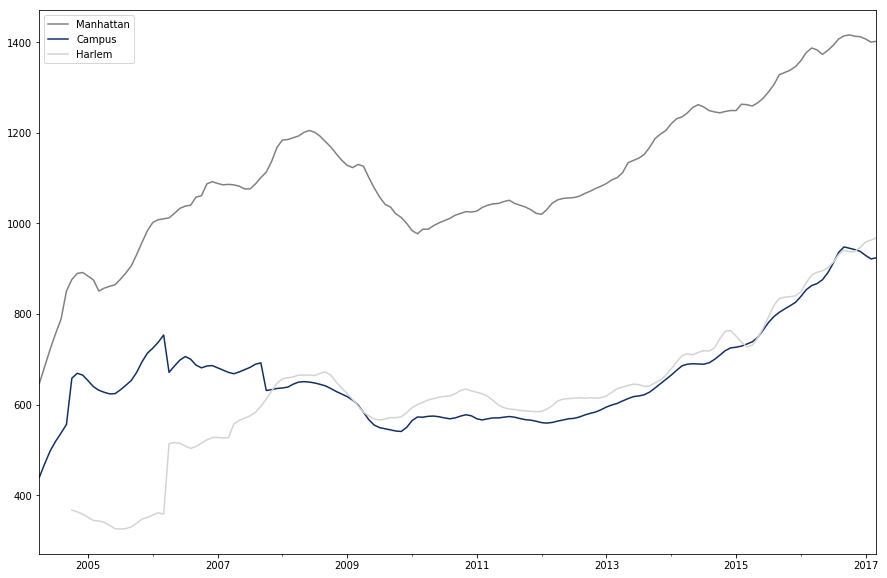

In [27]:
ax = manhattan_exc_campus_trans.plot(y='monthly_median', c='gray', figsize=(15,10), label='Manhattan')
campus_zips_trans.plot(y='monthly_median', c='#122E61', label='Campus', ax=ax)
harlem_exc_campus_trans.plot(y='monthly_median', c='lightgray', label='Harlem', ax=ax)

plt.savefig('monthly-medians-absolute.eps', bbox_inches='tight')

#### monhtly, pct_change

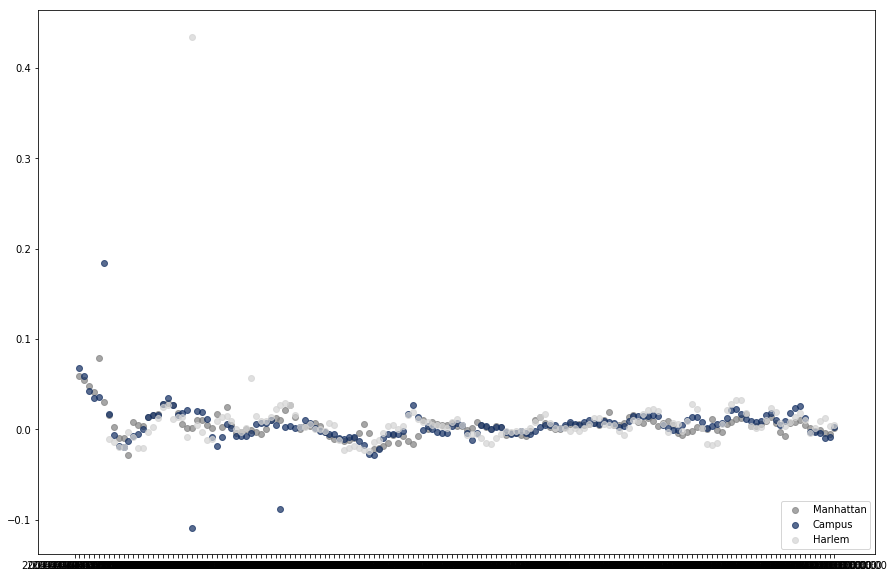

In [28]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

camp = campus_zips_trans.pct_change().reset_index() #df1 will have a numeric index, and a 
                        #column named 'index' containing the index labels from df2
harl = harlem_exc_campus_trans.pct_change().reset_index()
manh = manhattan_exc_campus_trans.pct_change().reset_index()

plt.figure(figsize=(15,10))
plt.scatter(camp.index,manh['monthly_median'],c='gray',edgecolor='gray', label='Manhattan', alpha=0.7)
plt.scatter(camp.index,camp['monthly_median'],c='#122E61',label='Campus', alpha=0.7)
plt.scatter(camp.index,harl['monthly_median'],c='lightgray',label='Harlem', alpha=0.7)
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(camp.index,camp['index']) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']

plt.savefig('monthly-medians-pctchange.eps', bbox_inches='tight')    
plt.show()

### monthly, indexed

In [29]:
df = pd.DataFrame(data = {'campus': [y[0].replace('[', '') for y in campus_zips_trans.resample('Q').median().values.astype(str).tolist()], 'harlem': [y[0].replace('[', '') for y in harlem_exc_campus_trans.resample('Q').median().values.astype(str).astype(str).tolist()], 'manhattan': [y[0].replace('[', '') for y in manhattan_exc_campus_trans.resample('Q').median().values.astype(str).tolist()]}, index=campus_zips_trans.resample('Q').index)
df['harlem'] = df['harlem'].replace('nan', 0)
df.campus = df.campus.astype(float).astype(int)
df.harlem = df.harlem.astype(float).astype(int)
df.manhattan = df.manhattan.astype(float).astype(int)
df['campus_index'] = df['campus']/df['campus'].ix['2004-06-30', 0]*100
df['harlem_index'] = df['harlem']/df['harlem'].ix['2004-12-31', 0]*100
df['harlem_index'] = df['harlem_index'].replace(0, numpy.nan)
df['manh_index'] = df['manhattan']/df['manhattan'].ix['2004-06-30', 0]*100
df.head(10)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Ple

,campus,harlem,manhattan,campus_index,harlem_index,manh_index
2004-06-30,470,0,685,100.000000,NaN,100.000000
2004-09-30,537,0,788,114.255319,NaN,115.036496
2004-12-31,665,363,889,141.489362,100.000000,129.781022
2005-03-31,639,344,875,135.957447,94.765840,127.737226
2005-06-30,624,333,861,132.765957,91.735537,125.693431
2005-09-30,642,326,890,136.595745,89.807163,129.927007
2005-12-31,694,347,958,147.659574,95.592287,139.854015
2006-03-31,737,358,1008,156.808511,98.622590,147.153285
2006-06-30,685,514,1022,145.744681,141.597796,149.197080
2006-09-30,700,507,1040,148.936170,139.669421,151.824818


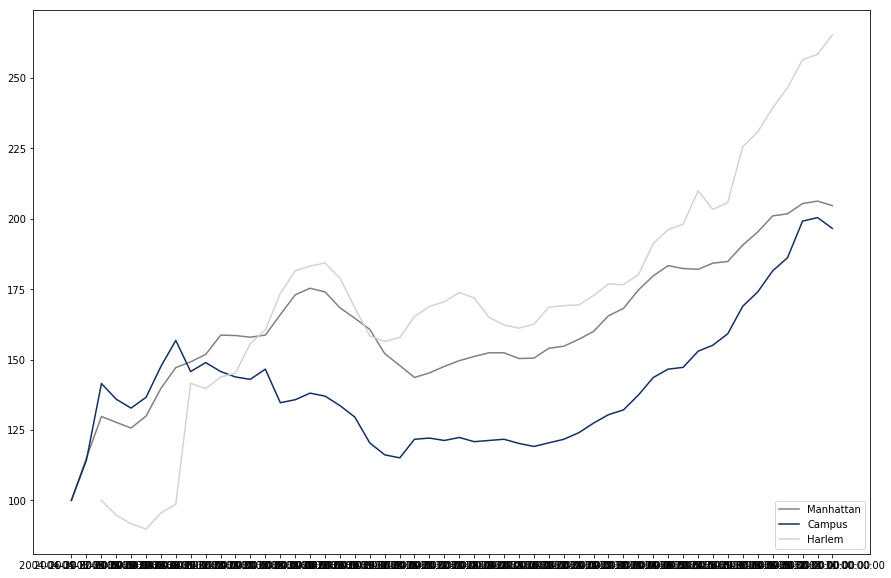

In [30]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

plt.figure(figsize=(15,10))
plt.plot(df.index, df.manh_index, c='gray', label='Manhattan')
plt.plot(df.index,df.campus_index, c='#122E61', label='Campus')
plt.plot(df.index,df.harlem_index, c='lightgray', label='Harlem')
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(df.index,df.index) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']

plt.savefig('area_monthly-medians-indexed.eps', bbox_inches='tight')    
plt.show()

### Cumulative monthly pct_change

In [31]:
campus_zips_trans.pct_change().monthly_median.cumsum()

2004-04-01         NaN
2004-05-01    0.068182
2004-06-01    0.127756
2004-07-01    0.169925
2004-08-01    0.204607
2004-09-01    0.239989
2004-10-01    0.423442
2004-11-01    0.440159
2004-12-01    0.434180
2005-01-01    0.415383
2005-02-01    0.395460
2005-03-01    0.382950
2005-04-01    0.375824
2005-05-01    0.370242
2005-06-01    0.371044
2005-07-01    0.384666
2005-08-01    0.400476
2005-09-01    0.416819
2005-10-01    0.444384
2005-11-01    0.479406
2005-12-01    0.506764
2006-01-01    0.522181
2006-02-01    0.540124
2006-03-01    0.561819
2006-04-01    0.452330
2006-05-01    0.473194
2006-06-01    0.492172
2006-07-01    0.503634
2006-08-01    0.495135
2006-09-01    0.476564
                ...   
2014-10-01    0.516185
2014-11-01    0.530290
2014-12-01    0.538635
2015-01-01    0.540704
2015-02-01    0.544145
2015-03-01    0.550318
2015-04-01    0.557134
2015-05-01    0.569998
2015-06-01    0.591389
2015-07-01    0.613640
2015-08-01    0.630285
2015-09-01    0.642250
2015-10-01 

In [32]:
harlem_exc_campus_trans.pct_change().monthly_median.cumsum()

2004-04-01         NaN
2004-05-01         NaN
2004-06-01         NaN
2004-07-01         NaN
2004-08-01         NaN
2004-09-01         NaN
2004-10-01         NaN
2004-11-01   -0.010899
2004-12-01   -0.024673
2005-01-01   -0.044226
2005-02-01   -0.064169
2005-03-01   -0.067076
2005-04-01   -0.075823
2005-05-01   -0.096411
2005-06-01   -0.117432
2005-07-01   -0.120499
2005-08-01   -0.117423
2005-09-01   -0.105153
2005-10-01   -0.080910
2005-11-01   -0.054283
2005-12-01   -0.042756
2006-01-01   -0.028511
2006-02-01   -0.014466
2006-03-01   -0.022776
2006-04-01    0.411582
2006-05-01    0.416450
2006-06-01    0.413543
2006-07-01    0.401881
2006-08-01    0.391065
2006-09-01    0.400012
                ...   
2014-10-01    0.792145
2014-11-01    0.814964
2014-12-01    0.816276
2015-01-01    0.800549
2015-02-01    0.783239
2015-03-01    0.768334
2015-04-01    0.773836
2015-05-01    0.795723
2015-06-01    0.823836
2015-07-01    0.856388
2015-08-01    0.889175
2015-09-01    0.907490
2015-10-01 

In [33]:
manhattan_exc_campus_trans.pct_change().monthly_median.cumsum()

2004-04-01         NaN
2004-05-01    0.058733
2004-06-01    0.113477
2004-07-01    0.161228
2004-08-01    0.202840
2004-09-01    0.281470
2004-10-01    0.311452
2004-11-01    0.326863
2004-12-01    0.329112
2005-01-01    0.320138
2005-02-01    0.310517
2005-03-01    0.282517
2005-04-01    0.290160
2005-05-01    0.294827
2005-06-01    0.298892
2005-07-01    0.312773
2005-08-01    0.328746
2005-09-01    0.346152
2005-10-01    0.373746
2005-11-01    0.402747
2005-12-01    0.429886
2006-01-01    0.448179
2006-02-01    0.454167
2006-03-01    0.456151
2006-04-01    0.458132
2006-05-01    0.468013
2006-06-01    0.478776
2006-07-01    0.483616
2006-08-01    0.485543
2006-09-01    0.502851
                ...   
2014-10-01    0.669001
2014-11-01    0.671413
2014-12-01    0.673016
2015-01-01    0.673016
2015-02-01    0.684225
2015-03-01    0.683434
2015-04-01    0.681056
2015-05-01    0.686616
2015-06-01    0.694515
2015-07-01    0.705487
2015-08-01    0.717890
2015-09-01    0.734736
2015-10-01 

KeyError: 'index'

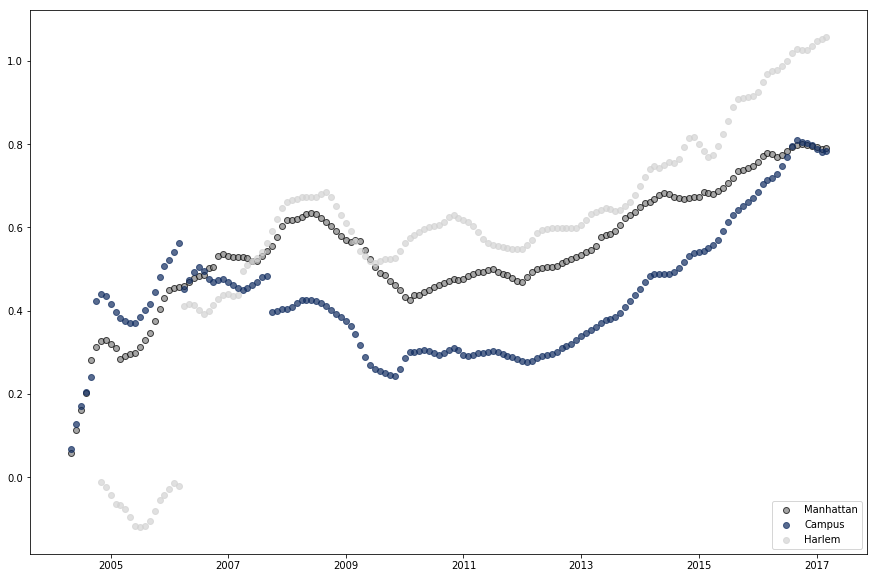

In [34]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

camp = campus_zips_trans.pct_change().monthly_median.cumsum() #df1 will have a numeric index, and a 
                        #column named 'index' containing the index labels from df2
harl = harlem_exc_campus_trans.pct_change().monthly_median.cumsum()
manh = manhattan_exc_campus_trans.pct_change().monthly_median.cumsum()

plt.figure(figsize=(15,10))
plt.scatter(camp.index,manh.values,c='gray',edgecolor='black', label='Manhattan', alpha=0.7)
plt.scatter(camp.index,camp.values,c='#122E61',label='Campus', alpha=0.7)
plt.scatter(camp.index,harl.values,c='lightgray',label='Harlem', alpha=0.7)
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(camp.index,camp['index']) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']

plt.savefig('areas_monthly-medians-cumulative-pctchange.eps', bbox_inches='tight')
plt.show()

### Plot quarter median

#### absolute values

In [35]:
campus_zips_trans.resample('Q').median()

RegionName,monthly_median
2004-06-30,470.0
2004-09-30,537.0
2004-12-31,665.0
2005-03-31,639.5
2005-06-30,624.0
2005-09-30,642.5
2005-12-31,694.5
2006-03-31,737.5
2006-06-30,685.0
2006-09-30,700.0


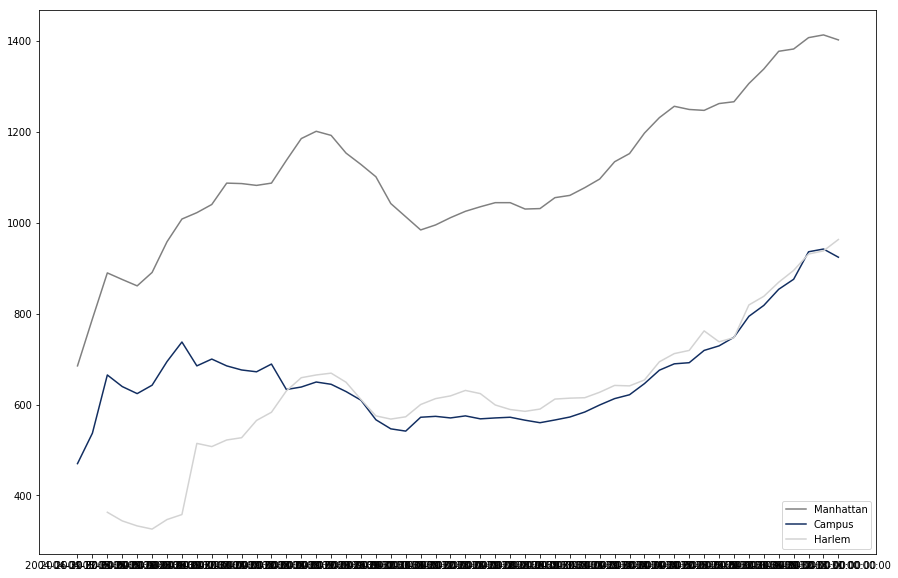

In [36]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

camp = campus_zips_trans.resample('Q').median().reset_index() #df1 will have a numeric index, and a 
                        #column named 'index' containing the index labels from df2
harl = harlem_exc_campus_trans.resample('Q').median().reset_index()
manh = manhattan_exc_campus_trans.resample('Q').median().reset_index()

plt.figure(figsize=(15,10))
plt.plot(camp.index,manh['monthly_median'],c='gray',label='Manhattan')
plt.plot(camp.index,camp['monthly_median'],c='#122E61',label='Campus')
plt.plot(camp.index,harl['monthly_median'],c='lightgray',label='Harlem')
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(camp.index,camp['index']) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']
plt.show()

##### pct_change

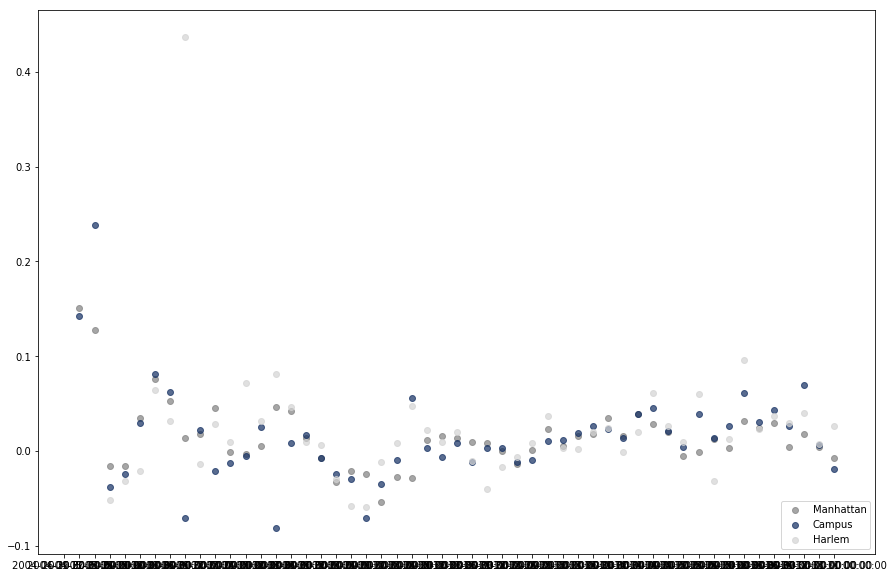

In [37]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

camp = campus_zips_trans.resample('Q').median().pct_change().reset_index() #df1 will have a numeric index, and a 
                        #column named 'index' containing the index labels from df2
harl = harlem_exc_campus_trans.resample('Q').median().pct_change().reset_index()
manh = manhattan_exc_campus_trans.resample('Q').median().pct_change().reset_index()

plt.figure(figsize=(15,10))
plt.scatter(camp.index,manh['monthly_median'],c='gray',edgecolor='gray', label='Manhattan', alpha=0.7)
plt.scatter(camp.index,camp['monthly_median'],c='#122E61',label='Campus', alpha=0.7)
plt.scatter(camp.index,harl['monthly_median'],c='lightgray',label='Harlem', alpha=0.7)
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(camp.index,camp['index']) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']
plt.show()

### Plot annual median, pct_change

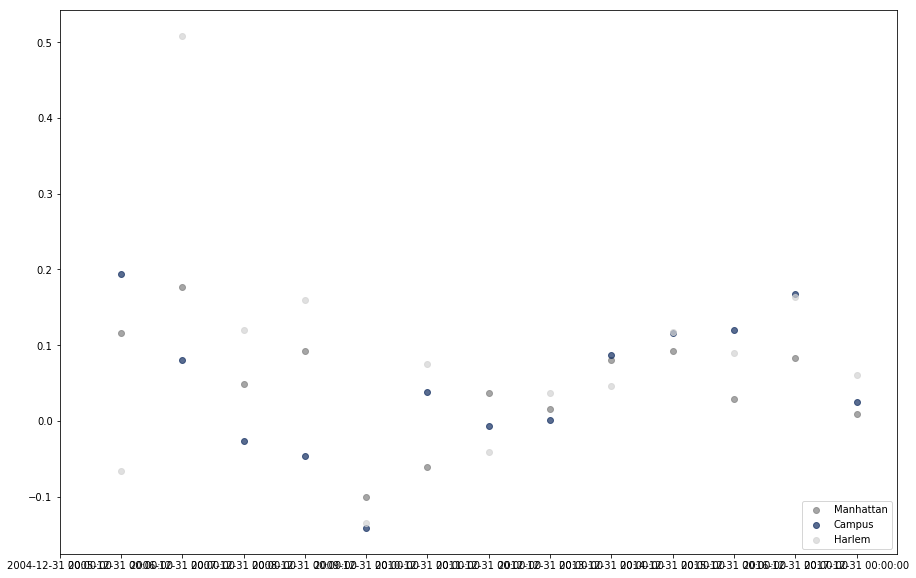

In [38]:
### https://stackoverflow.com/questions/30749963/pandas-plot-dataframe-as-scatter-complains-of-unknown-item

camp = campus_zips_trans.resample('A').median().pct_change().reset_index() #df1 will have a numeric index, and a 
                        #column named 'index' containing the index labels from df2
harl = harlem_exc_campus_trans.resample('A').median().pct_change().reset_index()
manh = manhattan_exc_campus_trans.resample('A').median().pct_change().reset_index()

plt.figure(figsize=(15,10))
plt.scatter(camp.index,manh['monthly_median'],c='gray',edgecolor='gray', label='Manhattan', alpha=0.7)
plt.scatter(camp.index,camp['monthly_median'],c='#122E61',label='Campus', alpha=0.7)
plt.scatter(camp.index,harl['monthly_median'],c='lightgray',label='Harlem', alpha=0.7)
plt.legend(loc=4) # Optional - show labelled legend, loc=4 puts it at bottom right
plt.xticks(camp.index,camp['index']) # explicitly set one tick per category and label them
                                   # according to the labels in column df1['index']
plt.show()